In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("SpaceX_Data.csv")

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1.0,False,False,False,NaN,1.0,0.0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B1004,-80.577366,28.561857


In [4]:
df.loc[:,'FlightNumber'] = list(range(1, df.shape[0]+1))
df.shape

(173, 17)

#Check Null

In [5]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass       24
Orbit              1
LaunchSite         0
Outcome            0
Flights            5
GridFins           5
Reused             5
Legs               5
LandingPad        31
Block              5
ReusedCount        5
Serial             5
Longitude          0
Latitude           0
dtype: int64

#Replace null values in PayloadMass with the mean Value

In [6]:
Mean_PayloadMass = df.PayloadMass.mean()
df['PayloadMass'] = df['PayloadMass'].replace(np.nan, Mean_PayloadMass)

In [7]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              1
LaunchSite         0
Outcome            0
Flights            5
GridFins           5
Reused             5
Legs               5
LandingPad        31
Block              5
ReusedCount        5
Serial             5
Longitude          0
Latitude           0
dtype: int64

#Replace null value for orbit column with the most repeated value

In [8]:
most_frequent_orbit = df['Orbit'].mode()[0]
df['Orbit'].fillna(most_frequent_orbit, inplace=True)

In [9]:
#drop LandingPad as large number of nulls are found
df.drop(['LandingPad'], axis=1, inplace=True)

In [10]:
#drop any null value found as by checking for this values found their landing outcome is None None
df.dropna(inplace=True)
df.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

In [11]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights           float64
GridFins           object
Reused             object
Legs               object
Block             float64
ReusedCount       float64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

#Number of Launches on each Site

In [12]:
df.LaunchSite.value_counts()

LaunchSite
CCSFS SLC 40    93
KSC LC 39A      49
VAFB SLC 4E     26
Name: count, dtype: int64

#Number of Launches for each orbit

In [13]:
df.Orbit.value_counts()

Orbit
VLEO     55
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: count, dtype: int64

#Number of Landing for each Region and successs or not

In [14]:
landing_outcomes = df.Outcome.value_counts()
landing_outcomes

Outcome
True ASDS      109
True RTLS       23
None None       19
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: count, dtype: int64

In [15]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 True RTLS
2 None None
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [16]:
bad_outcomes=set(landing_outcomes.keys()[[2,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

#Adding Class to detect if is successful land or not

In [17]:
landing_class = [0 if x in bad_outcomes else 1 for x in df['Outcome']]
# landing_class
df['Class']=landing_class

In [18]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8183.607718,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,False,False,False,1.0,0.0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,2022-08-28,Falcon 9,13260.000000,VLEO,KSC LC 39A,True ASDS,2.0,True,True,True,5.0,1.0,B1069,-80.603956,28.608058,1
164,165,2022-08-31,Falcon 9,13260.000000,VLEO,VAFB SLC 4E,True ASDS,7.0,True,True,True,5.0,6.0,B1063,-120.610829,34.632093,1
165,166,2022-09-17,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,6.0,True,True,True,5.0,5.0,B1067,-80.577366,28.561857,1
166,167,2022-09-24,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,4.0,True,True,True,5.0,0.0,B1072,-80.577366,28.561857,1


#removing outliers

In [19]:

# Select numeric columns but exclude 'class' and 'FlightNumber'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Class', 'FlightNumber'])

# Calculate the IQR for numeric columns
Q1 = numeric_columns.quantile(0.2)
Q3 = numeric_columns.quantile(0.8)
IQR = Q3 - Q1

# Detect outliers in numeric columns
outliers_condition = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))

# This will give you a DataFrame with True/False where True indicates an outlier





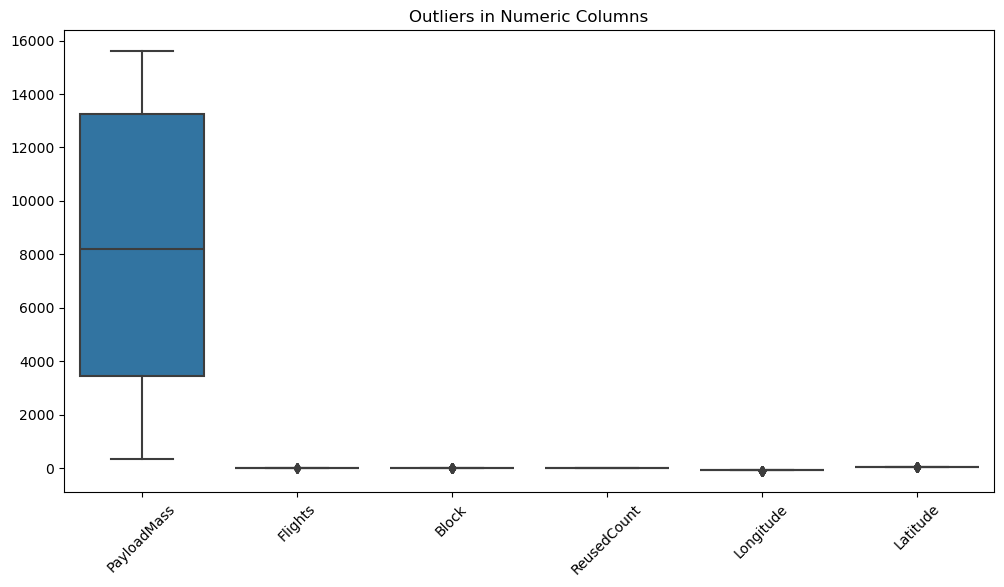

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers for each numeric column using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.title("Outliers in Numeric Columns")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [21]:
# Count the number of records with any outlier
outliers_count = outliers_condition.any(axis=1).sum()

# Total number of records
total_records = len(df)

# Print the number of outliers and their percentage
print(f"Number of records with outliers: {outliers_count}")
print(f"Total number of records: {total_records}")
print(f"Percentage of records with outliers: {outliers_count / total_records * 100:.2f}%")


Number of records with outliers: 26
Total number of records: 168
Percentage of records with outliers: 15.48%


In [22]:
# Remove rows that have outliers
df_cleaned = df[~outliers_condition.any(axis=1)]


In [23]:
df_cleaned.to_csv("SpaceX_Data_Cleaned.csv", index=False)

#check balance of data

In [24]:
# Count the number of records for each class (0 and 1)
class_counts = df['Class'].value_counts()

# Print the number of records for each class
print(f"Class 0: {class_counts[0]} records")
print(f"Class 1: {class_counts[1]} records")


Class 0: 31 records
Class 1: 137 records


In [25]:


from imblearn.over_sampling import SMOTENC

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)  # All columns except target 'class'
y = df['Class']  # Target column (class)

# Detect categorical features based on their data types
# Categorical columns typically have 'object' data type, while numeric columns have 'int64' or 'float64'
categorical_features_indices = X.select_dtypes(include=['object']).columns

# Get the indices of categorical features
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features_indices]

# Initialize SMOTE-NC with categorical feature indices
smote_nc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)

# Apply SMOTE-NC to the dataset
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# Check the new class distribution
print(df_resampled['Class'].value_counts())


Class
0    137
1    137
Name: count, dtype: int64


In [26]:
df_resampled.to_csv("SpaceX_Data_Cleaned_upsampled.csv", index=False)